In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

In [27]:
#Reading in the data set
df = pd.read_csv("C:\\Users\\User\\Desktop\\py\\supermarket_sales2.csv")

In [28]:
#Wieving first few rows of data set 
df.head()


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [29]:
#Checking the data types of the columns
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [30]:
#Changing data type of Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_23532\4129349604.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [31]:
#Setting the date column as the index for the data frame
df.set_index('Date', inplace=True)
df

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-03-10  745-74-0715      A     Yangon        Normal    Male   
2019-01-26  452-04-8808      B   Mandalay        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   
...                            ...         ...       ...      ...       ...   
2019-02-22      Home and lifestyle       65.82       1.0   3.2910   69.1110   
2019-02-18     Fashion accessories       88.34       7.0  30.9190  649.2990   
2019-02-18     Fashion accessories       88.34       7.0  30.9190  649.2990   
2019-03-10  Electronic accessories         NaN       2.0   5.8030  121.8630   
2019-01-26  Electronic accessories       87.08       NaN  30.4780  640.0380   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   
2019-03-10  20:46      Ewallet  116.06                 4.761905        5.8030   
2019-01-26  15:17         Cash  609.56                 4.761905       30.4780   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-02-22     4.1  
2019-02-18     6.6  
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5  

[1003 rows x 16 columns]

In [32]:
#Looking at some summary statistics for the numerical columns in the data frame
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               8.886215e-16     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

C:\Users\User\AppData\Local\Temp\ipykernel_23532\950291307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


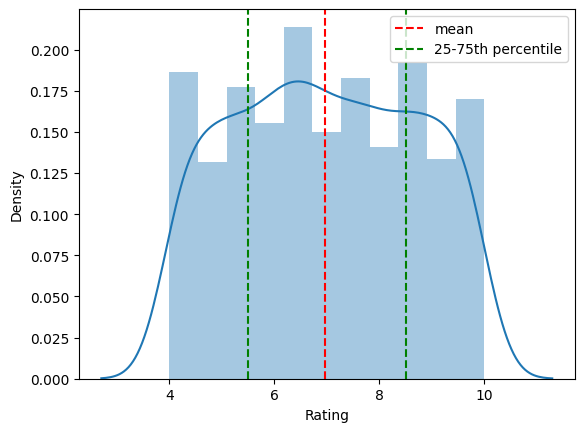

In [33]:
#Looking at the distribution of the customer ratings
sns.distplot(df["Rating"])
plt.axvline(x = np.mean(df["Rating"]), c="red", ls = "--", label = "mean")
plt.axvline(x = np.percentile(df["Rating"], 25), c="green", ls = "--", label = "25-75th percentile")
plt.axvline(x = np.percentile(df["Rating"], 75), c="green", ls = "--")
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

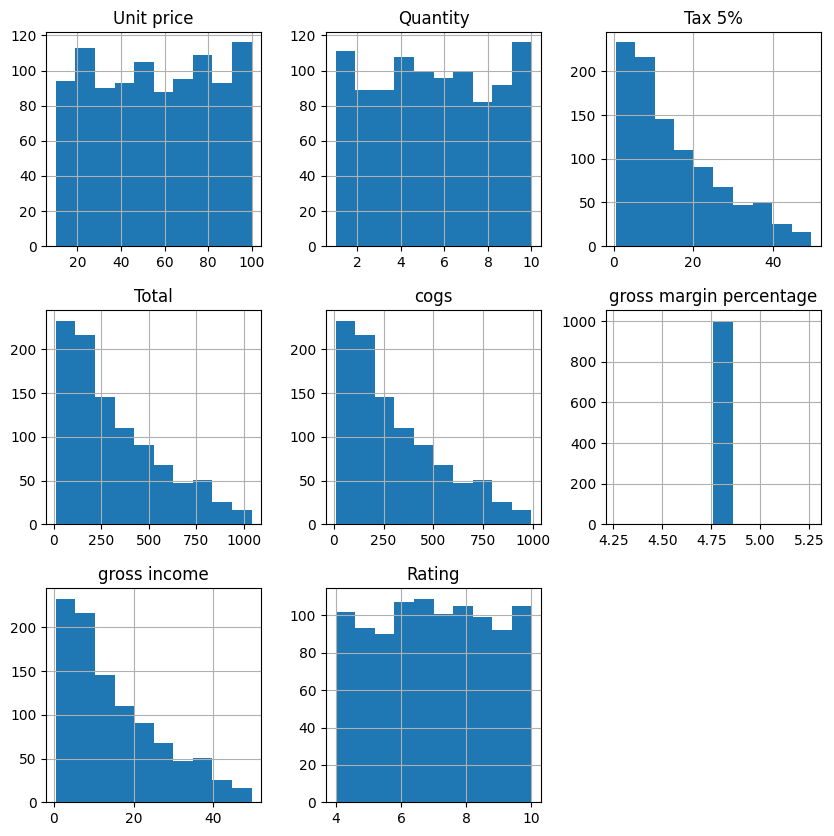

In [34]:
#Looking at the distributions of all columns
df.hist(figsize = (10,10))

<Axes: xlabel='Branch', ylabel='count'>

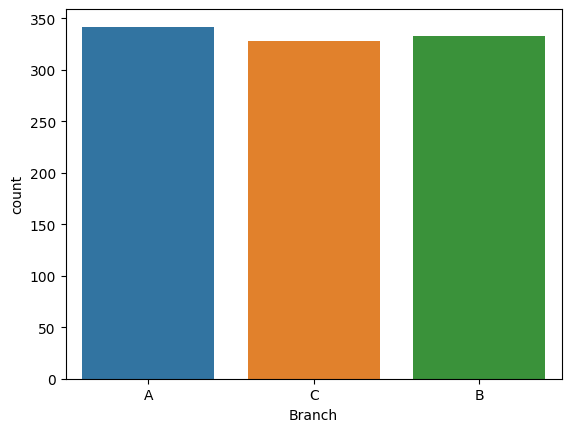

In [35]:
#Looking at the sales numbers of the branches
sns.countplot(x = df["Branch"])

In [36]:
#Looking at the exact sales numbers of branches
df["Branch"].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

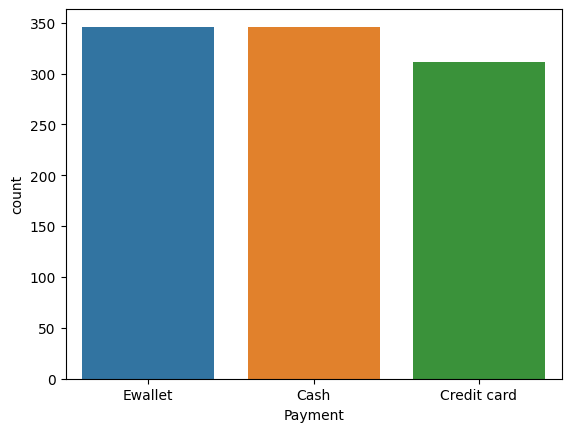

In [37]:
#Looking at the sales numbers by the payment methods
sns.countplot(x = df["Payment"])

Connected to Python 3.11.3

<Axes: xlabel='Rating', ylabel='gross income'>

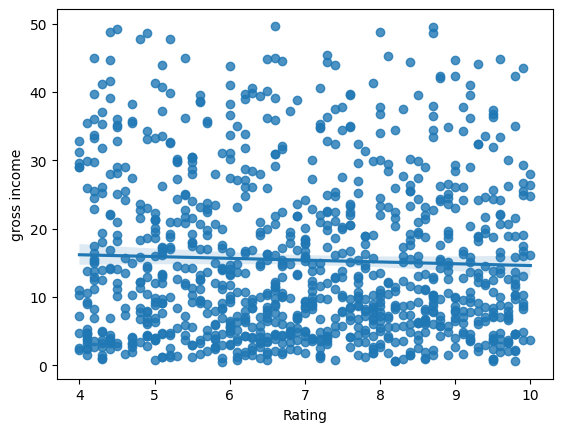

In [38]:
#Looking at the relationship between gross income and customer ratings
sns.regplot(x=df["Rating"], y=df["gross income"])

<Axes: xlabel='Branch', ylabel='gross income'>

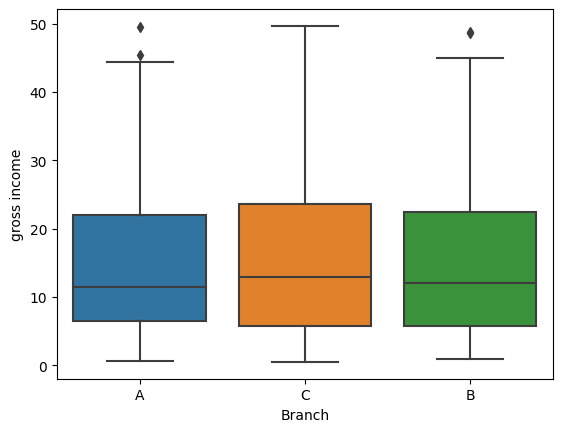

In [39]:
#Looking at the variances in gross income between branches
sns.boxplot(x = df["Branch"], y = df["gross income"])

<Axes: xlabel='Gender', ylabel='gross income'>

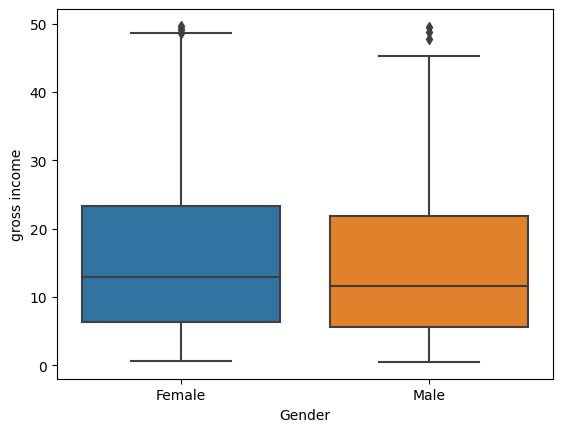

In [40]:
#Looking at the if there is a relationship between gross income and gender
sns.boxplot(x = df["Gender"], y = df["gross income"])

In [41]:
#Aggregating data by date taking the mean of the numeric values
df.groupby("Date").mean(numeric_only = True)

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<Axes: xlabel='Date', ylabel='gross income'>

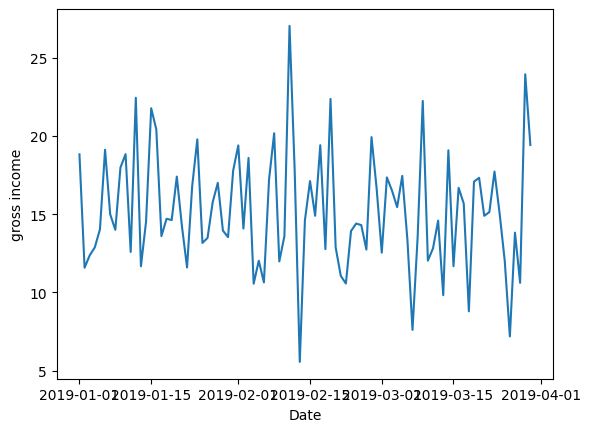

In [42]:
#Checking if there is a time trend in gross income
sns.lineplot(x = df.groupby("Date").mean(numeric_only=True).index,
             y = df.groupby("Date").mean(numeric_only=True)["gross income"])

In [43]:
#Number of rows that are duplicated
df.duplicated().sum()

3

In [44]:
#Looking at the duplicated rows
df[df.duplicated()]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [45]:
#Dropping duplicated rows
df.drop_duplicates(inplace=True)

In [46]:
#Looking at the ratio of missing values to total number of values in the column
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

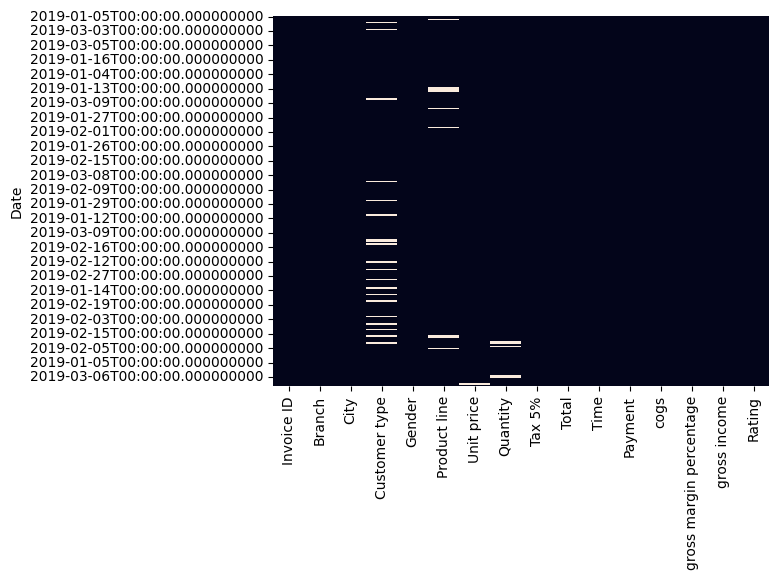

In [47]:
#Visualising the missing values
sns.heatmap(df.isna(), cbar=False)

In [48]:
#Filling the missing numerical values with mean for each column
df.fillna(df.mean(numeric_only=True), inplace=True)

In [49]:
#Filling the missing categorical values with mode for each column
df.fillna(df.mode().iloc[0], inplace=True)

In [97]:
#Seeing the overview report of the analysis of the data 
dataset =pd.read_csv("C:\\Users\\User\\Desktop\\py\\supermarket_sales2.csv")
prof = ProfileReport(dataset)
prof

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


In [50]:
#Correlation coefficient matrix of gross income and rating
np.corrcoef(df["gross income"], df["Rating"])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [51]:
#Exact correlation coefficient between gross income and rating rounded to 2 decimal places
round(np.corrcoef(df["gross income"], df["Rating"])[1][0],2)

-0.04

In [52]:
#Correlation matrix for all numeric columns
df.corr(numeric_only=True)

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.014786  0.629034  0.629034  0.629034   
Quantity                   0.014786  1.000000  0.704067  0.704067  0.704067   
Tax 5%                     0.629034  0.704067  1.000000  1.000000  1.000000   
Total                      0.629034  0.704067  1.000000  1.000000  1.000000   
cogs                       0.629034  0.704067  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.629034  0.704067  1.000000  1.000000  1.000000   
Rating                    -0.006601 -0.021225 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.629034 -0.006601  
Quantity                                     NaN      0.704067 -0.021225  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [53]:
#Correlation matrix for all numeric columns rounded to 2 decimal places
np.round(df.corr(numeric_only=True),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<Axes: >

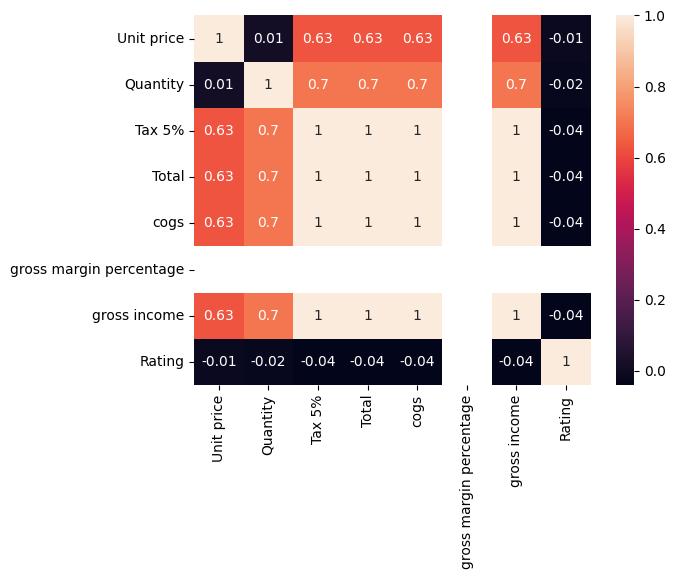

In [54]:
#Visualisation of the correlation matrix
sns.heatmap(np.round(df.corr(numeric_only=True),2), annot=True)